# Pymaceuticals Inc.
---

### Analysis

From the data provided three main observations can be made that could drive further research: 
1. Capomulin and Ramicane seem to have smaller volume tumors than the other regimines provided, however, they also saw the most mice prescribed this regimine thereby potentially skewing the data. A better study would be to control number of mice which receive the different treatments equally then see if same result is true. 
2. For Capomulin treatment, the greatest improvement saw from Timepoint 0 to Timepoint 5, then steadily decreased till Timepoint 20 for the mouse observed. 
3. There seems to be a strong correlation between mouse weight and volume (or size) of a mouse's tumor, indicating heavier mice tend to see larger tumors. 
 

In [187]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table with the specified columns
print(combined_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [188]:
# Checking the number of mice.
unique_mice_ids = combined_data["Mouse ID"].nunique()
print(f"Unique mice IDs: {unique_mice_ids}")

Unique mice IDs: 249


In [189]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [354]:
# Optional: Get all the data for the duplicate mouse ID. 


In [369]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Reset index if needed
cleaned_mice_data.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
print(cleaned_mice_data)

Original DataFrame length: 1893
Cleaned DataFrame length: 1888
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1883     z969     Naftisol  Male           9          30         25   
1884     z969     Naftisol  Male           9          30         30   
1885     z969     Naftisol  Male           9          30         35   
1886     z969     Naftisol  Male           9          30         40   
1887     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000               

In [396]:
# Checking the number of mice in the clean DataFrame.
print("Original DataFrame length:", len(combined_data))
print("Cleaned DataFrame length:", len(cleaned_data))


Original DataFrame length: 1893
Cleaned DataFrame length: 1888


## Summary Statistics

In [409]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats_table = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
summary_stats_table.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Group the data by 'Drug Regimen' and calculate the required statistics
print(summary_stats_table)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [433]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_table = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
print(summary_stats_table)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

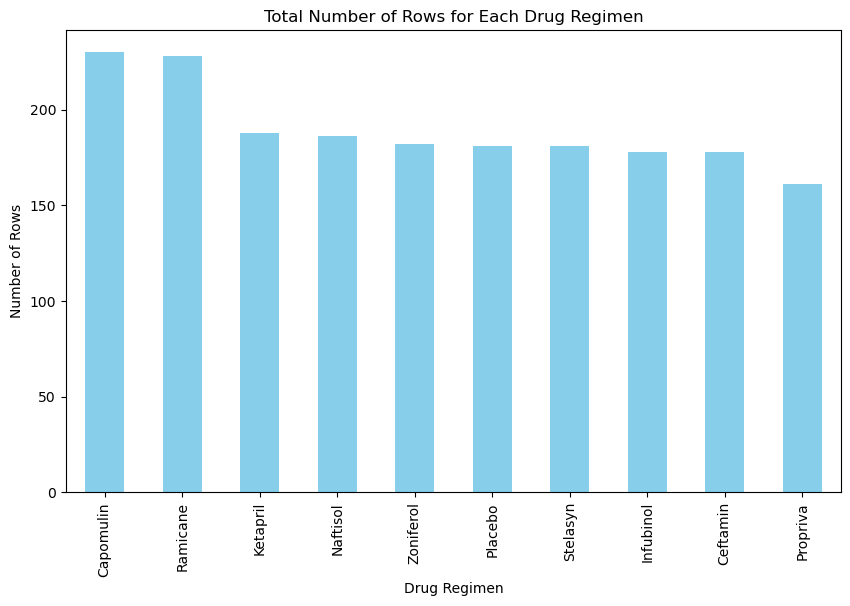

In [444]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

# Plot a bar chart using Pandas
drug_regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()

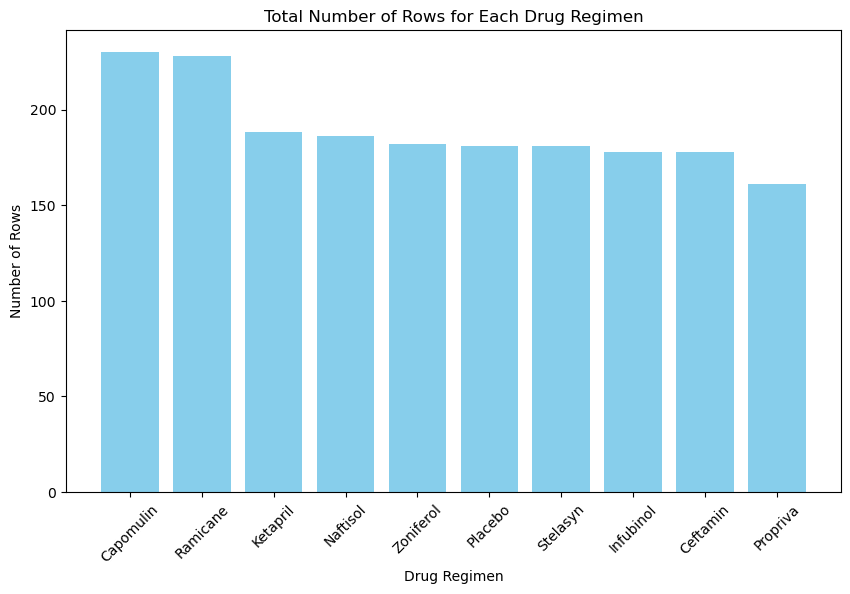

In [454]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='skyblue')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

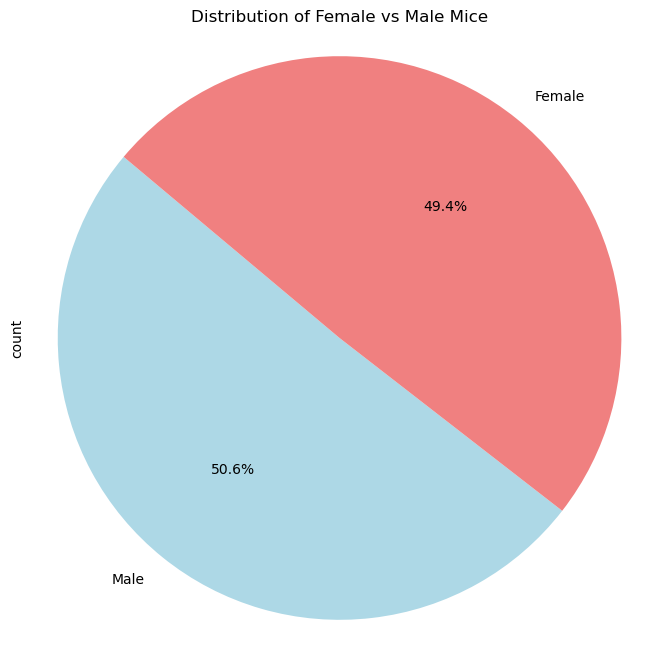

In [463]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Counts number of male vs. female mice
gender_distribution = combined_data['Sex'].value_counts()
#Creates pie chart
gender_distribution.plot(kind='pie', colors=['lightblue', 'lightcoral'], autopct='%1.1f%%', startangle=140, figsize=(8, 8))

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

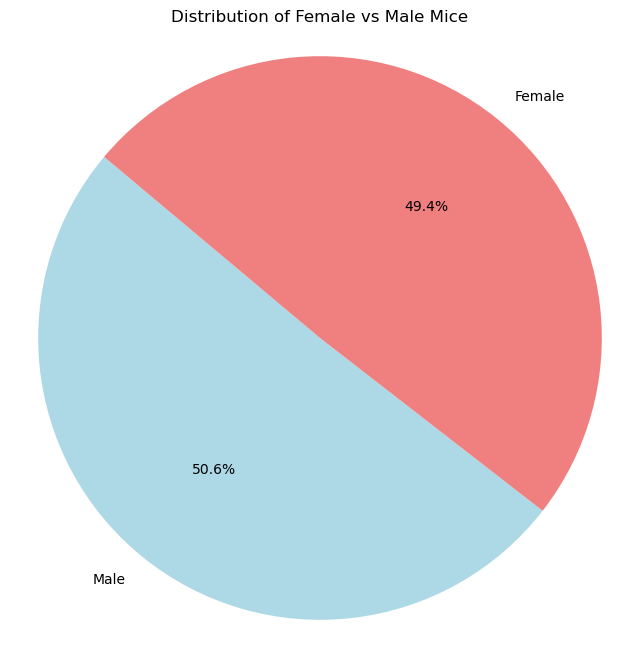

In [471]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, colors=['lightblue', 'lightcoral'], autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Quartiles, Outliers and Boxplots

In [478]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = combined_data[combined_data['Drug Regimen'].isin(specified_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_tumor_volume.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, final_tumor_volume, on=['Mouse ID', 'Timepoint'], how='left')

# Display the DataFrame with the final tumor volume for each mouse
print(merged_data)

   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [484]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(subset)
    
    # Calculate the quartiles and IQR
    quartiles = subset.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine potential outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    #Display potential outliers
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


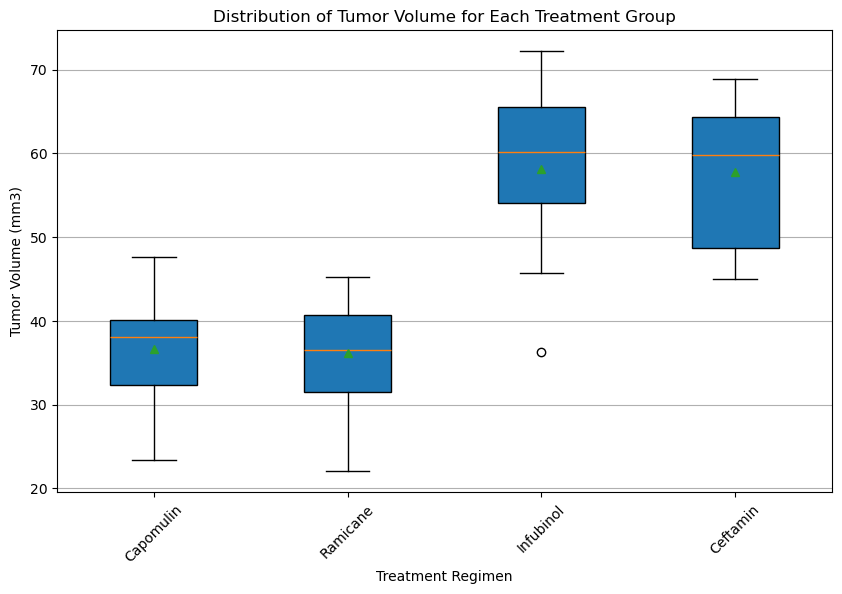

In [489]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment group
tumor_volume_data = [merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments_list]

# Create a box plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments_list, patch_artist=True, showmeans=True)

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Line and Scatter Plots

In [499]:
#Find mice treated with Capomulin
capomulin_mice = combined_data[combined_data['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()

# Print the Mouse IDs treated with Capomulin
print("Mouse IDs treated with Capomulin:")
print(capomulin_mice)

Mouse IDs treated with Capomulin:
['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


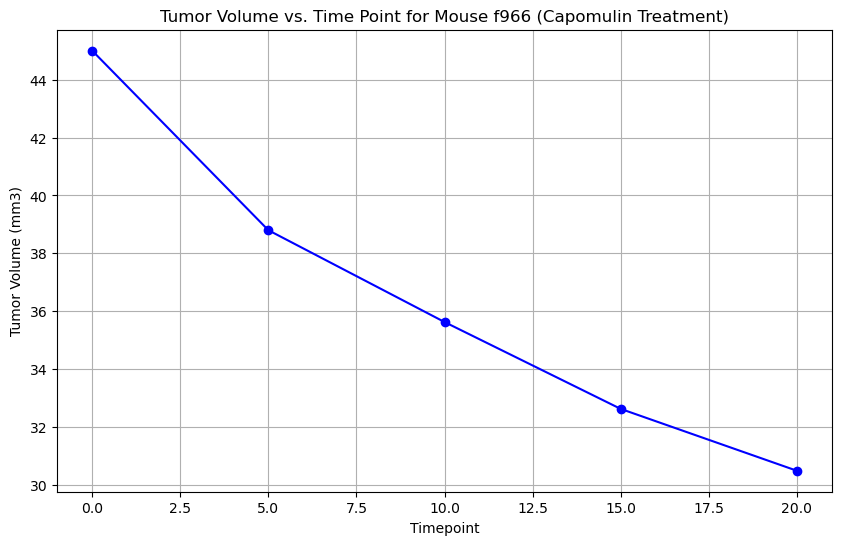

In [503]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse treated with Capomulin
mouse_id = 'f966'
capomulin_data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == mouse_id)]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.show()

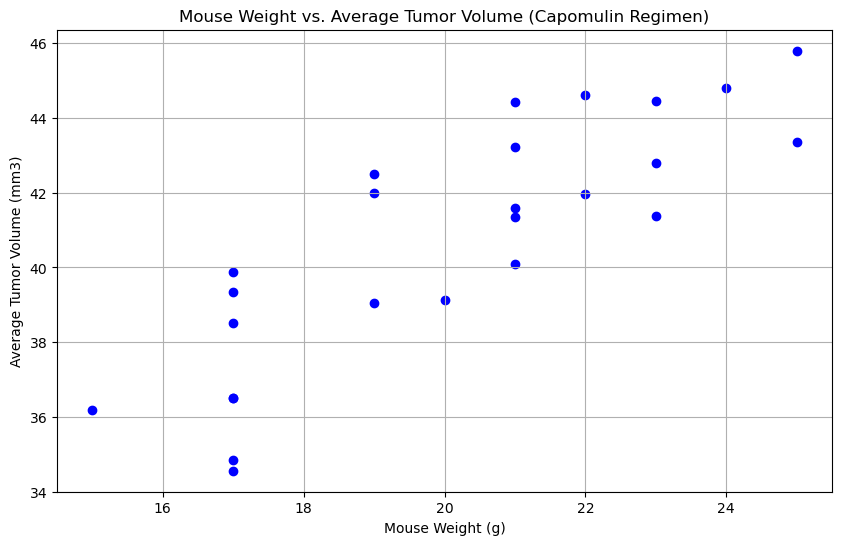

In [507]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each Mouse ID
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='b', marker='o')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


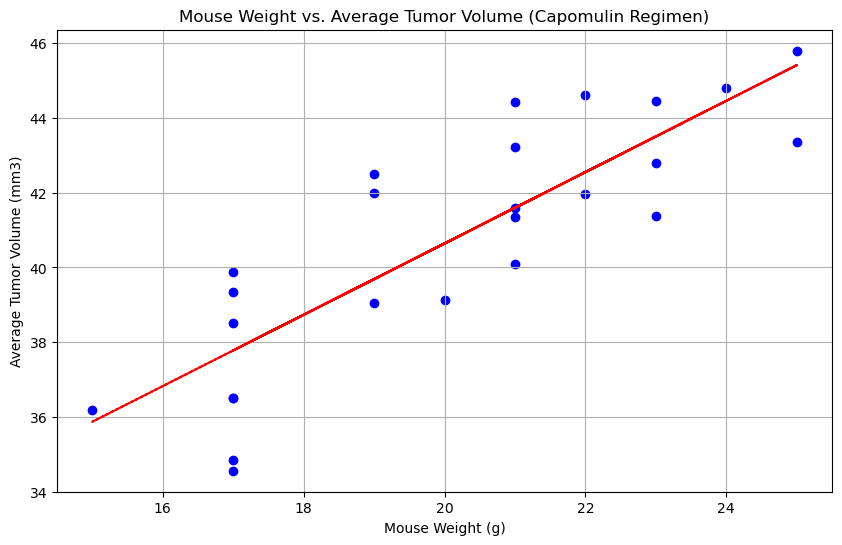

In [513]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation_coefficient = avg_tumor_volume.corr(mouse_weight)
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, avg_tumor_volume)

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='b', marker='o')

# Plot the linear regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='r', linestyle='--')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.show()
